<a href="https://colab.research.google.com/github/MAL3X-01/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Marvin_Davila_DS5_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np

In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [0]:
# making columns name with for loop
columns = [f'A{i}' for i in range(1, 17)]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names = columns)

In [4]:
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
# No na value but data stated missing values
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [6]:
# ? as Na value
df['A4'].value_counts()

u    519
y    163
?      6
l      2
Name: A4, dtype: int64

In [0]:
# Changing all ? to NaN
df = df.applymap(lambda x: np.NaN if x == '?' else x)

In [8]:
df['A4'].value_counts()

u    519
y    163
l      2
Name: A4, dtype: int64

In [9]:
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [10]:
# Checking type for each column, some need to be changed to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null object
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [0]:
# Changing all continous columns to float
df['A2'] = df['A2'].apply(lambda x: float(x))
df['A11'] = df['A11'].apply(lambda x: float(x))
df['A14'] = df['A14'].apply(lambda x: float(x))
df['A15'] = df['A15'].apply(lambda x: float(x))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


In [13]:
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

In [0]:
# Separsting df into 2df by their classes('A16')
positive = df[df['A16'] == '+']
negative = df[df['A16'] == '-']

In [16]:
print(positive.shape)
positive.head()

(307, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [17]:
print(negative.shape)
negative.head()

(383, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


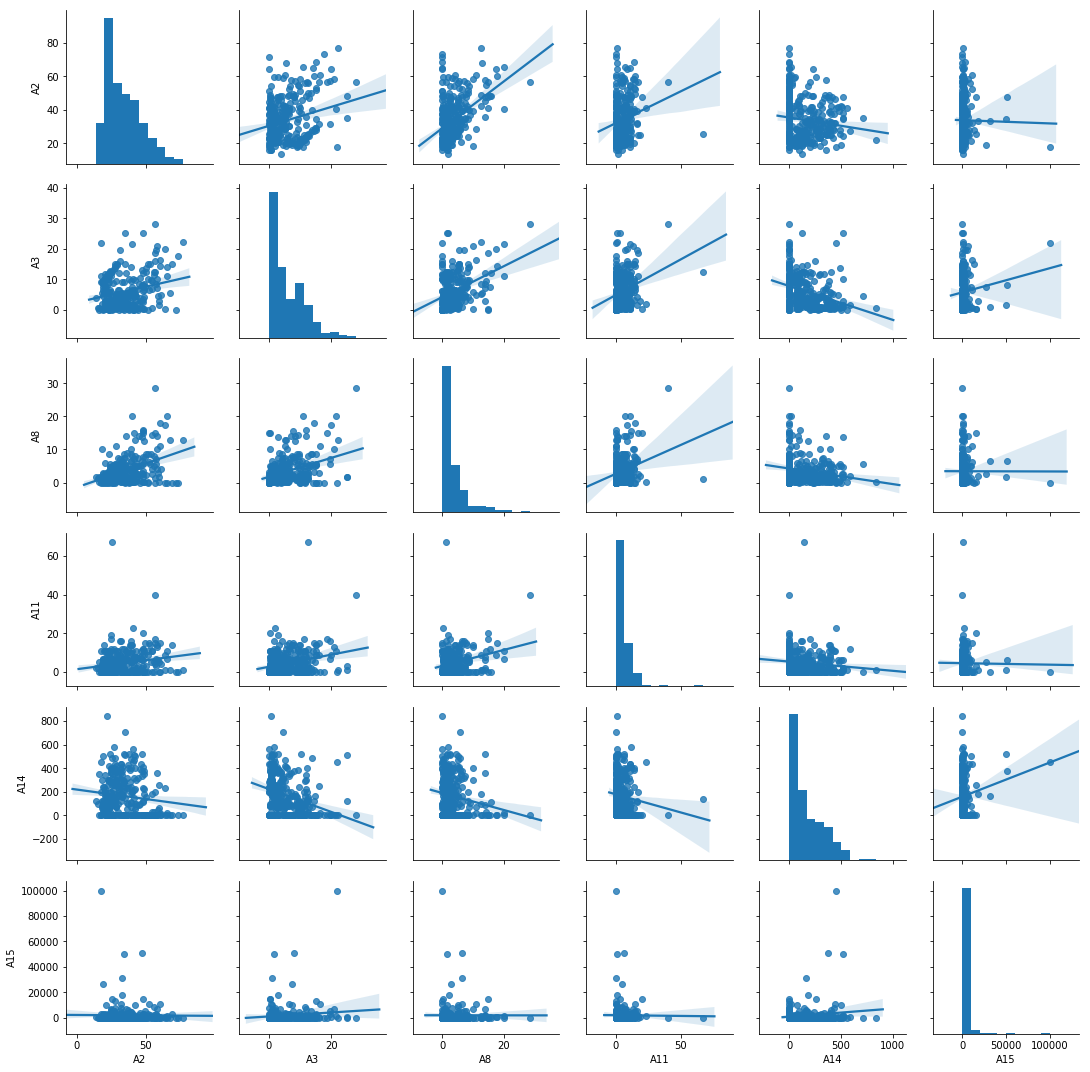

In [18]:
sns.pairplot(positive, kind = 'reg' );

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


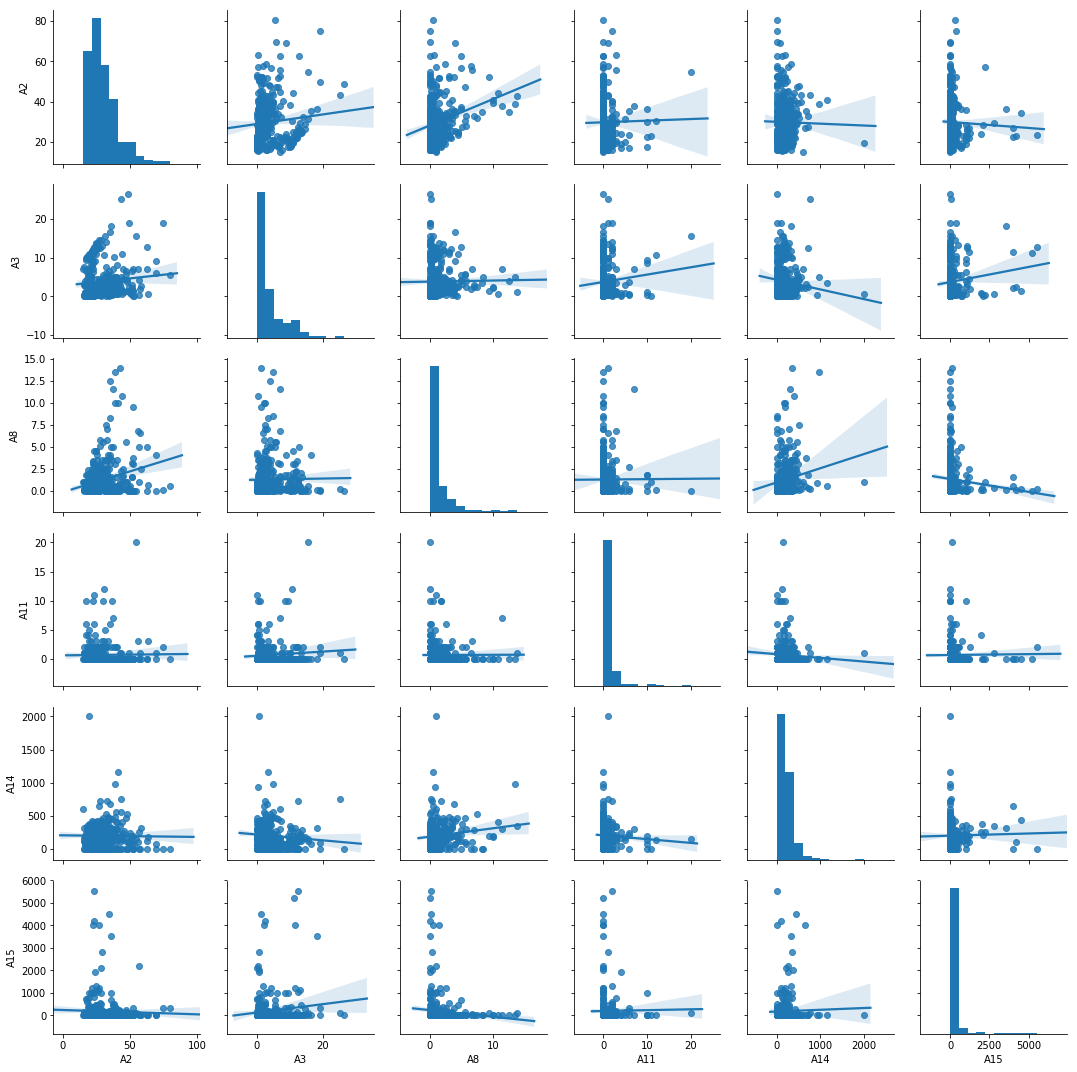

In [19]:
sns.pairplot(negative, kind = 'reg');

In [20]:
positive.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [21]:
negative.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [22]:
# The most extreme p value out of all the columns 
ttest_ind(positive['A11'], negative['A11'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [23]:
ttest_ind(positive['A15'], negative['A15'], nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [24]:
# One the least significant p value
ttest_ind(positive['A14'], negative['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [25]:
ct = pd.crosstab(df['A9'], df['A16'])
ct

A16,+,-
A9,,
f,23,306
t,284,77


In [26]:
# most extreme significant 
chi = stats.chi2_contingency(ct)
print(f'Statistic: {chi[0]}, P-Value: {chi[1]}, DOF: {chi[2]}')

Statistic: 355.2038167412799, P-Value: 3.1185900878457007e-79, DOF: 1


In [27]:
ct1 = pd.crosstab(df['A13'], df['A16'])
ct1

A16,+,-
A13,,
g,287,338
p,5,3
s,15,42


In [28]:
# Least significant 
chi1 = stats.chi2_contingency(ct1)
print(f'Statistic: {chi1[0]} P-Value: {chi1[1]} DOF: {chi1[2]}')

Statistic: 9.191570451545383 P-Value: 0.010094291370456362 DOF: 2


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# T-Test Results
The first t-test is the extreme difference between the classes. It was with column 'A11' and the result is Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29). Reject the Null Hypothesis that mean for both df 's column are the same.

The least significant result for the classes is Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569).('A14') Reject the Null Hyptothesis that the mean for both df's column are the same.

# Chi-Squared Tests Results

The most extreme significant  column is  'A9' between the two classes. The result is (statistic = 355.2038167412799, P-Value =
 3.1185900878457007e-79, dof = 1). There is high dependency of the values in relationship with class label 'A9','A16'.
 
 One of the least significant column is 'A13' between the two classes. The result is (statistic = 9.191570451545383, P-Value
 0.010094291370456362, dof = 2). Also somewhat dependency in relationship with class label 'A13','A16' because pvalue<.05.

# Challenges

The most challenging part for me in this sprint challenge was the 2nd part. Trying to figure out which column will have an extreme or least amount of significance. I had to brutefully check all columns against each other to figure it out.  I'm not totally sure what to look for in exploratory/visualization other then big difference in mean or std. Still have a hard time interpeting the numbers and explaing my results as well.